ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values. It is a generalization of the simpler AutoRegressive Moving Average (ARMA) model. The ARIMA model can be used to forecast future time steps of a time series.﻿using System;

- ARIMA (p, d, q) where:
    - p is the number of autoregressive terms,
    - d is the number of nonseasonal differences needed for stationarity, and
    - q is the number of lagged forecast errors in the prediction equation.
 
 ARIMA is defined as the sum of the AR(p) and the MA(q) terms. The AR(p) term refers to the auto-regressive part of the model, which incorporates past values. The MA(q) term refers to the moving average part of the model, which incorporates past errors. The I(d) term refers to the integrated part of the model, which indicates the number of nonseasonal differences needed for stationarity. 


The ARIMA model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.    
- The model can be summarized as
- 
AR vs MA Model 

In [1]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA


c:\Users\HP\miniconda3\envs\ML_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


144    439.854371
145    465.295856
146    500.665679
147    535.971883
148    561.690766
149    571.315493
150    562.975621
151    539.732488
152    508.530532
153    478.148192
154    456.746448
155    449.694646
Name: predicted_mean, dtype: float64


<Axes: >

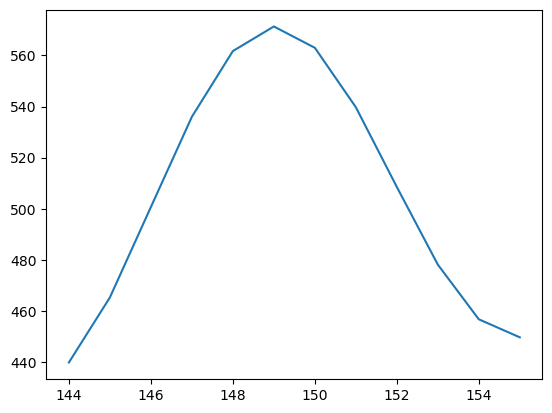

In [2]:


# load the data
df = pd.read_csv('AirPassengers.csv')

#  we will use the passengers column to train our ARIMA model.
# for this example we will use an ARIMA (2,1,2) model.

model = ARIMA(df['#Passengers'], order=(2,1,2))
model_fit = model.fit()

prediction = model_fit.forecast(steps=12)

print(prediction)


prediction.plot()


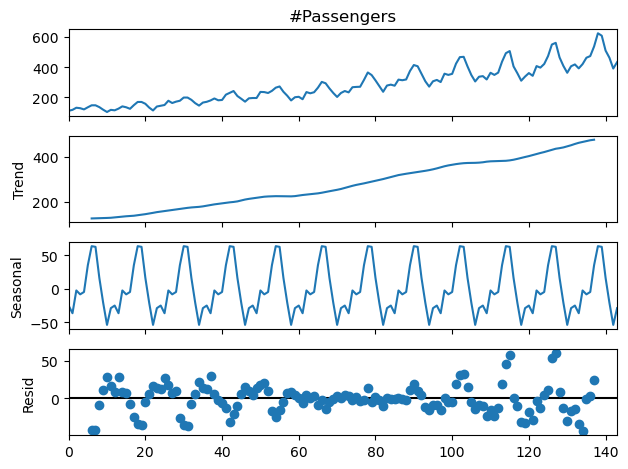

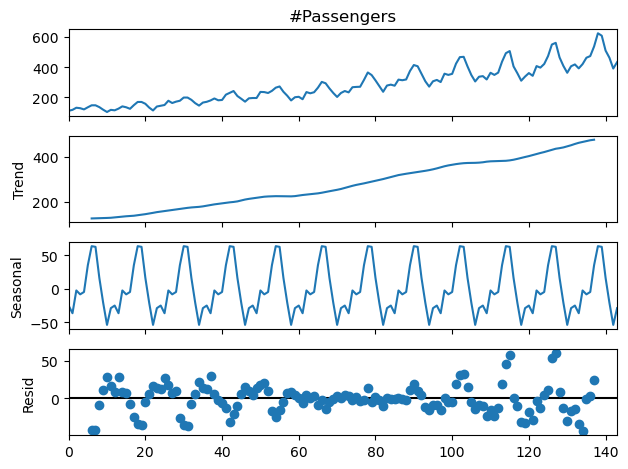

In [3]:
# decompose the time series into trend , seasonality and residual components 

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['#Passengers'], model='additive', period=12)
result.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np 

result= adfuller(df['#Passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print("is data stationay ?", result[1]< 0.05)

ADF Statistic: 0.815369
p-value: 0.991880
is data stationay ? False


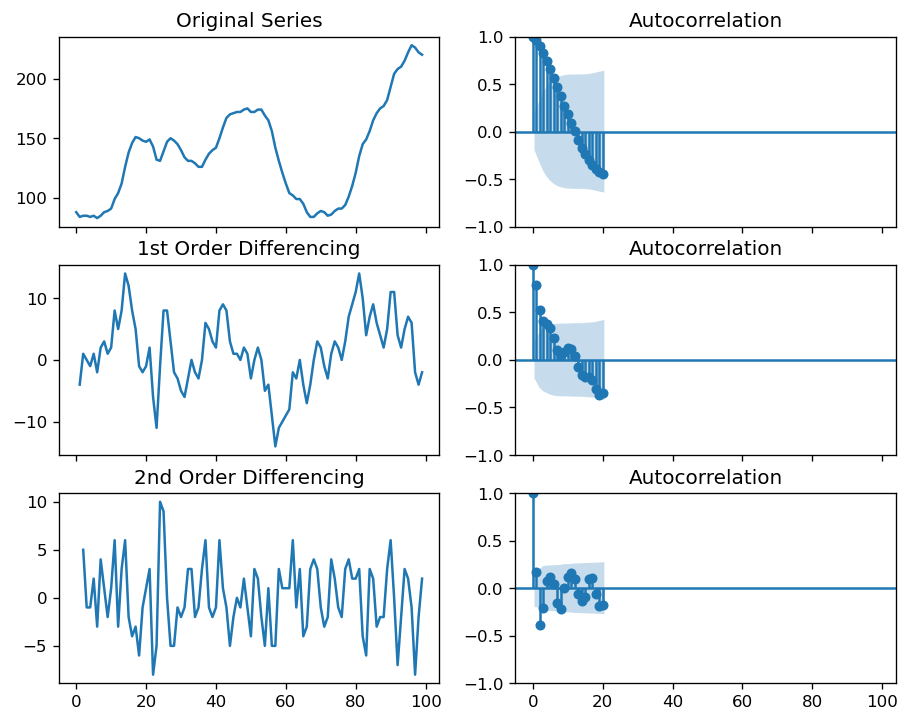

In [5]:
import numpy as np , pandas as pd 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# laod data wwwusage.csv 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

#original data
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [6]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
print(ndiffs(df.value, test='adf')) # 1
print(ndiffs(df.value, test='kpss')) # 0
print(ndiffs(df.value, test='pp')) # 2

2
0
2


# Loading Data 

For this notebook, we wil be using the `wwwusage.csv` dataset, which contains the number of user accessing a website over time. We can load the data using the 
following code:

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df.head()


,value
0,88
1,84
2,85
3,85
4,84


# Stationarity Test

Before we can apply.ARIMA model to our data, we need to check if the data is stationary or not. Stationarity is an important assumption of ARIMA model, which means that the statistical properties of the time series remain constant over time.
# Importing the libraries
# ----------------------------

import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
